In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Load the NSFG pregnancy file and select live births:

In [3]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

# Histogram of birth weights

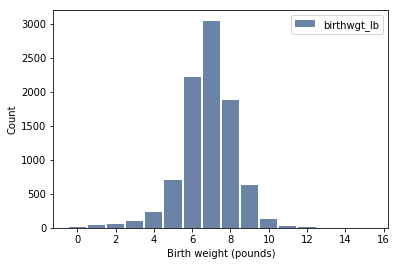

In [9]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

# 3.1 PMFs

To normalize the disrtibution, we could divide through by the total count:

In [11]:
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n

The result is a probability mass function

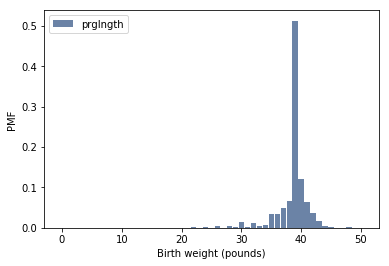

In [13]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

In [14]:
import thinkstats2
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [15]:
#modify Pmf by incrementing the probability associated with a value
pmf.Incr(2, 0.2)
pmf.Prob(2)

0.6000000000000001

In [16]:
# you can also multiply a pmf by a factor
pmf.Mult(2, 0.5)
pmf.Prob(2)

0.30000000000000004

In [17]:
# If you modify a Pmf, the result may not be normalized 
#(the probabilities may no longer add up to 1)
pmf.Total()

0.8999999999999999

In [18]:
# renormalize
pmf.Normalize()
pmf.Total()

1.0

In [19]:
# Here's the PMF of pregnancy length for live births.
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

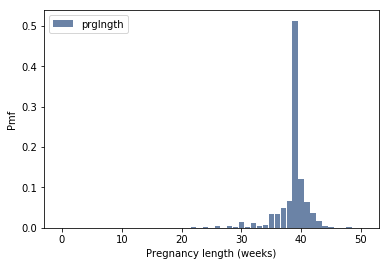

In [21]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

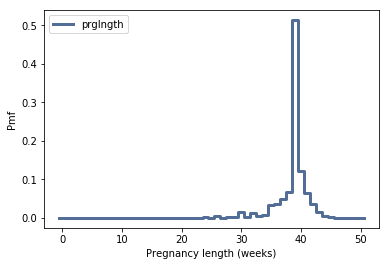

In [22]:
#Here's what it looks like plotted with Pmf, which makes a step function
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [23]:
live, firsts, others = first.MakeFrames()

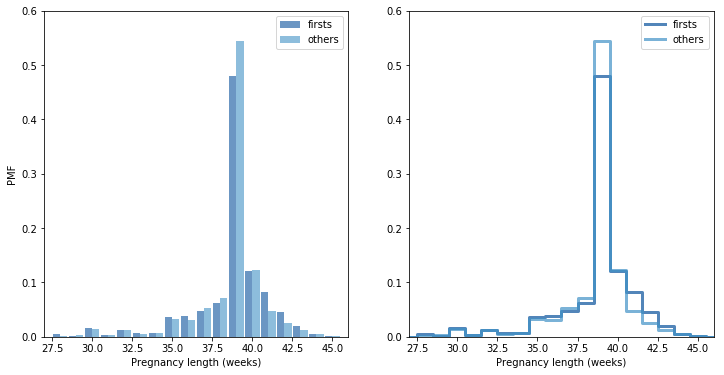

In [25]:
# Distributions of pregnancy length
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

# PMF of pregnancy lengths for first babies and others, using bar graphs and step functions
width = 0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length (weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 


We will plot this graph because the biggest differences in the distributions are near the mode - so when we zoom in the graph, we will have a better understanding about the dataset.

No handlers could be found for logger "matplotlib.legend"


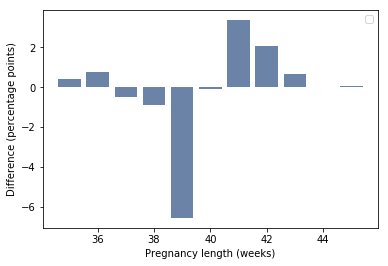

In [28]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Difference (percentage points)')

In [30]:
# first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42
# we can't be sure this effect is real; it might be due to random variation